In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns

### VOT Section

In [2]:
vot = pd.read_csv('data/vots.csv')
vot.head()

,language,gender,height,closure,vot,pclo,tclo,kclo,pvot,tvot,kvot
0,English,Female,162.50,0.022967,0.088828,0.022,0.0207,0.0262,0.086985,0.087877,0.091621
1,English,Male,177.00,0.050667,0.054667,0.081,0.0320,0.0390,0.072000,0.049000,0.043000
2,English,Female,170.18,0.070000,0.166667,0.070,0.0700,0.0700,0.150000,0.230000,0.120000
3,English,Male,178.00,0.039667,0.145667,0.034,0.0560,0.0290,0.170000,0.190000,0.077000
4,English,Female,177.80,0.100333,0.154000,0.144,0.0940,0.0630,0.132000,0.153000,0.177000


Types of plots:

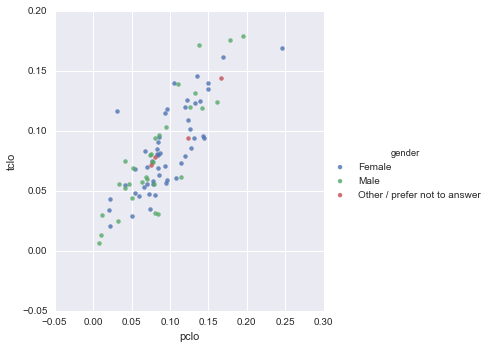

In [3]:
sns.lmplot('pclo', 'tclo', data=vot, fit_reg=False, hue="gender")

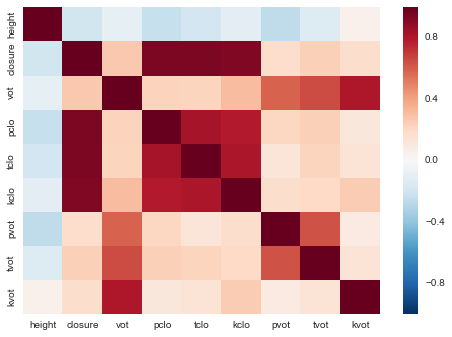

In [4]:
sns.heatmap(vot.corr())

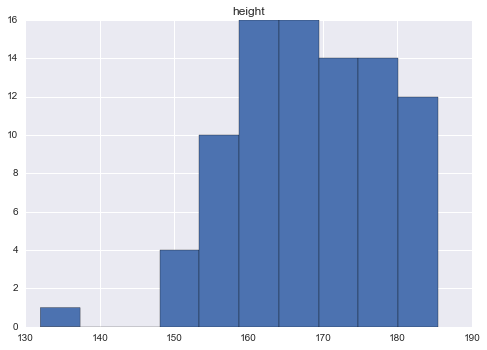

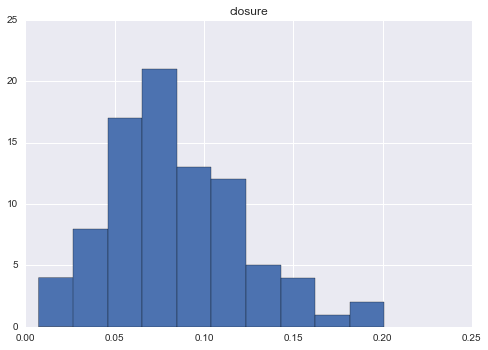

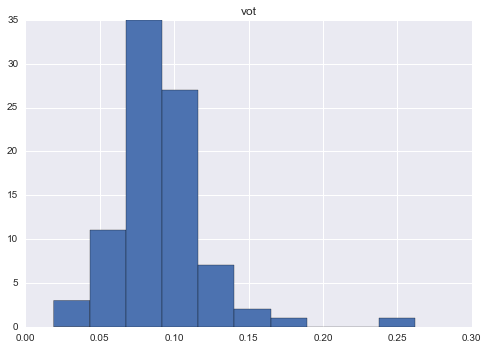

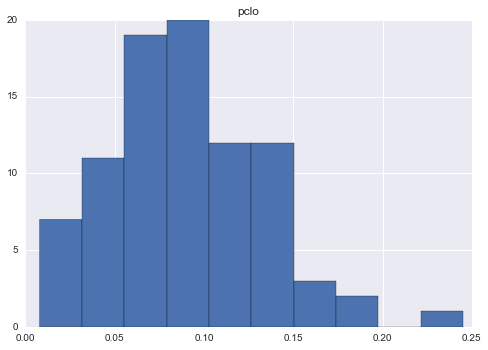

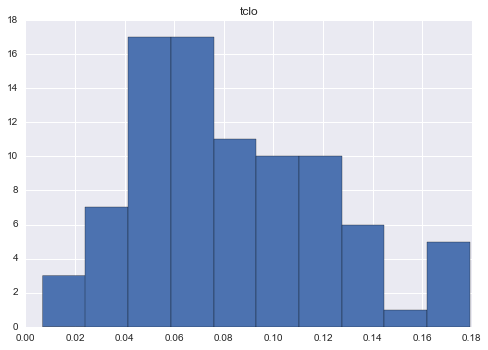

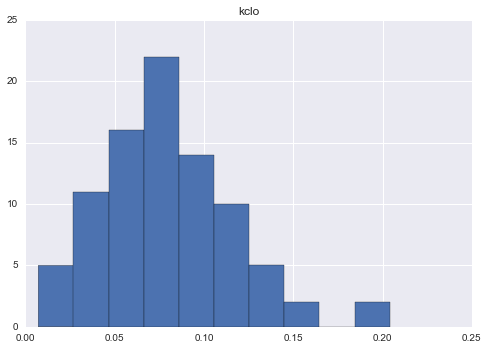

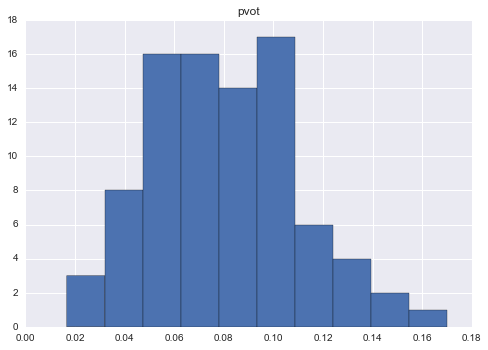

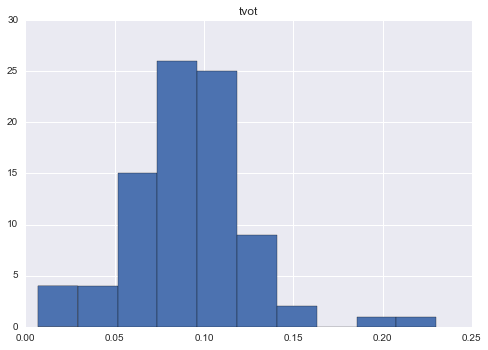

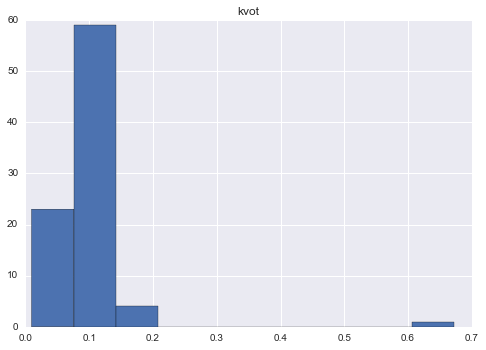

In [5]:
for column in vot.columns[2:]:
    vot.hist(column)

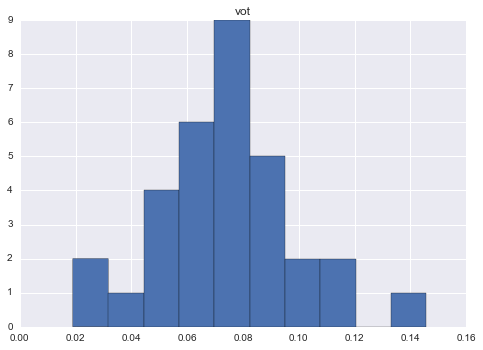

In [6]:
maleTable = vot.loc[vot['gender'] == "Male"].hist(4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11666e160>]], dtype=object)

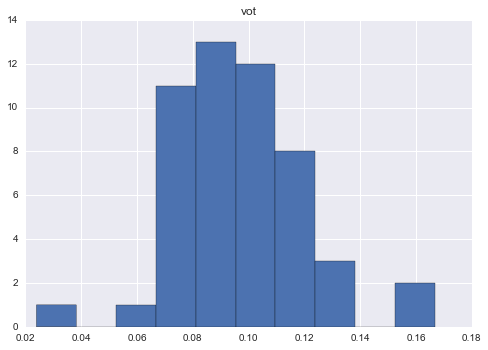

In [7]:
vot.loc[vot['gender'] == "Female"].hist(4)

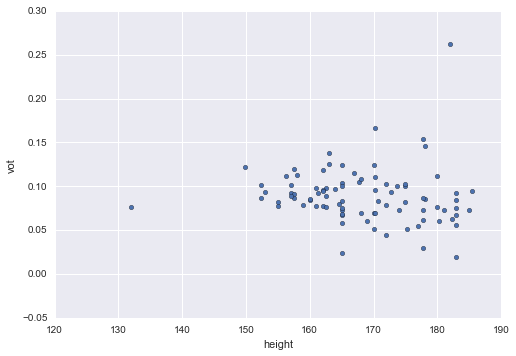

In [8]:
vot.plot.scatter("height",  "vot")

### Timit Section

In [9]:
files = ['data/vowel_midpoints_dr' + str(ind) + '.txt' for ind in range(1,9)]
timit = pd.concat([pd.read_csv(file, sep='\t') for file in files]).reset_index(drop=True)
timit.head(20)

,speaker,gender,file,t,word,vowel,stress,duration,f1,f2,f3,f0
0,fcjf0,female,sa1,0.3225,SHE,IY,1,0.08,486.2,2467.9,3185.1,244.9
1,fcjf0,female,sa1,0.5025,HAD,AE,1,0.10,595.1,2067.0,2976.7,241.6
2,fcjf0,female,sa1,0.6825,YOUR,UH,1,0.04,468.7,1956.1,3061.4,201.9
3,fcjf0,female,sa1,0.8525,DARK,AA,1,0.10,740.4,1674.1,2767.3,221.5
4,fcjf0,female,sa1,1.1975,SUIT,UW,1,0.17,464.0,1698.0,2904.9,232.6
5,fcjf0,female,sa1,1.3275,IN,AH,0,0.03,501.4,1929.1,2874.8,269.0
6,fcjf0,female,sa1,1.5525,GREASY,IY,1,0.04,431.5,2186.3,2858.7,207.8
7,fcjf0,female,sa1,1.7325,GREASY,IY,0,0.06,431.1,1368.3,2896.4,223.5
8,fcjf0,female,sa1,1.9175,WASH,AA,1,0.11,687.4,1309.6,2681.4,191.7
9,fcjf0,female,sa1,2.1775,WATER,AO,1,0.09,568.0,1105.9,2852.3,182.3


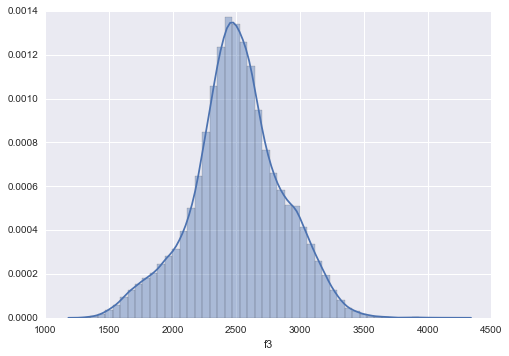

In [10]:
sns.distplot(timit['f3'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11567bb70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1155a4e10>], dtype=object)

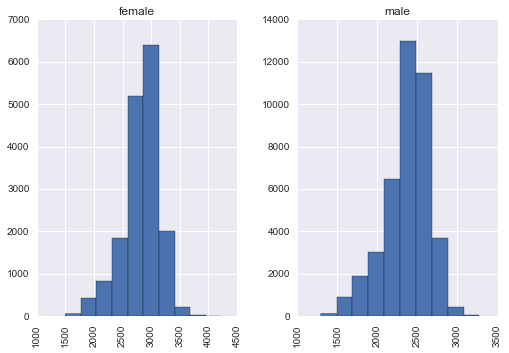

In [11]:
timit['f3'].hist(by=timit['gender'])

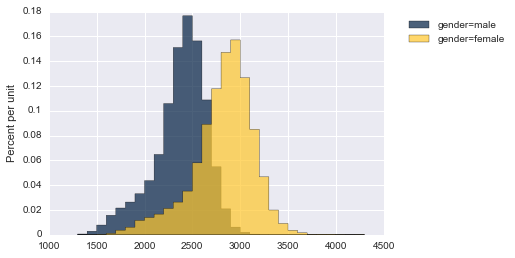

In [12]:
import datascience as ds

table = ds.Table.from_df(timit)
table.select(['f3', 'gender']).hist(group='gender', bins=range(1300, 4400, 100))

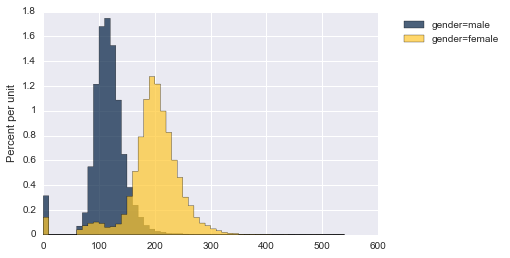

In [13]:
table.select(['f0', 'gender']).hist(group='gender', bins=range(0, 550, 10))

In [14]:
# the above can be futher broken down by each vowel sound
timit.groupby('vowel').count()

,speaker,gender,file,t,word,stress,duration,f1,f2,f3,f0
vowel,,,,,,,,,,,
AA,3281,3281,3281,3281,3281,3281,3281,3281,3281,3281,3281
AE,5247,5247,5247,5247,5247,5247,5247,5247,5247,5247,5247
AH,13569,13569,13569,13569,13569,13569,13569,13569,13569,13569,13569
AO,2590,2590,2590,2590,2590,2590,2590,2590,2590,2590,2590
AW,744,744,744,744,744,744,744,744,744,744,744
AY,2474,2474,2474,2474,2474,2474,2474,2474,2474,2474,2474
EH,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015
ER,4007,4007,4007,4007,4007,4007,4007,4007,4007,4007,4007
EY,2239,2239,2239,2239,2239,2239,2239,2239,2239,2239,2239


In [15]:
timit.groupby('word').count().head()

,speaker,gender,file,t,vowel,stress,duration,f1,f2,f3,f0
word,,,,,,,,,,,
A,859,859,859,859,859,859,859,859,859,859,859
ABBREVIATE,28,28,28,28,28,28,28,28,28,28,28
ABIDES,2,2,2,2,2,2,2,2,2,2,2
ABILITY,8,8,8,8,8,8,8,8,8,8,8
ABLE,6,6,6,6,6,6,6,6,6,6,6


In [16]:
# TODO: a speaking profile for one individual (focus on corner vowels)